In [ ]:
###

error: OpenCV(4.6.0) /croot/opencv-suite_1691620365762/work/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


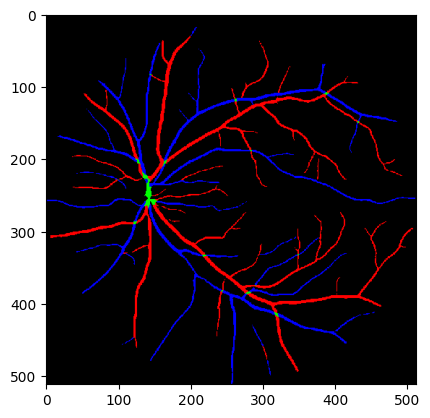

In [20]:
import os 
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_root = 'Results/M2/optic_disc_cup/raw/'
img_name = '0003441522_20200820_080825_Color_L_001.png'


img_root = 'Results/M2/artery_vein/raw/'

img_pth = os.path.join(img_root,img_name)
img = cv2.imread(img_pth)

plt.imshow(img.astype(np.uint8),cmap='gray')

def optic_center(optic_mask):

    # 读取二值图像，其中圆形的值为0，其他位置的值为1
    binary_image = np.where(optic_mask==0,0,255).astype(np.uint8)

    # 查找图像中的轮廓
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 如果找到轮廓
    if contours:
        # 计算每个轮廓的边界矩形，并找到最大的边界矩形
        max_area = -1
        largest_rect = None

        for contour in contours:
            rect = cv2.boundingRect(contour)
            x, y, w, h = rect
            area = w * h

            if area > max_area:
                max_area = area
                largest_rect = rect

        if largest_rect is not None:
            # 计算最大边界矩形的中心坐标并绘制矩形
            x, y, w, h = largest_rect
            center_x = x + w // 2
            center_y = y + h // 2
            OD = np.max((w,h))
            return (center_x,center_y),OD
            # 在图像上标记矩形的中心
            # cv2.circle(binary_image, (center_x, center_y), 2, (0, 0, 255), 3)  # 用红色标记矩形中心
            # cv2.rectangle(binary_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # 用绿色绘制边界矩形

            # # 显示带有矩形中心标记的图像
            # cv2.imshow('Largest Rectangle', binary_image)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()

            # # 打印最大矩形的中心坐标
            # print(f'Largest Rectangle Center Coordinates: ({center_x}, {center_y})')
        else:
            print('No rectangles found in the image.')
    else:
        print('No contours found in the image.')
        
        
print(optic_center(img))

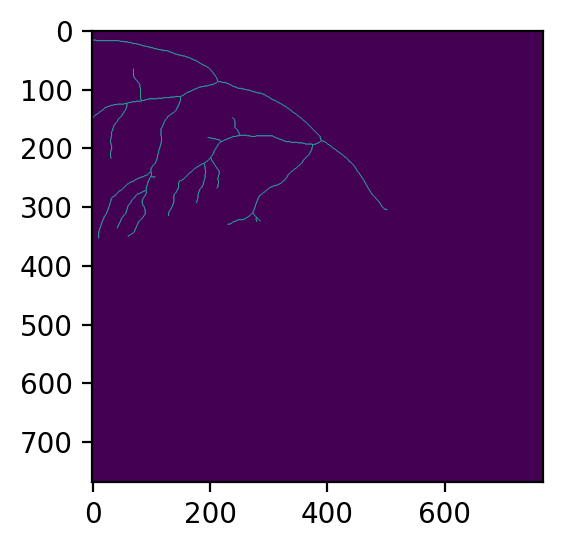

In [5]:
import skimage 
import cv2
import matplotlib.pyplot as plt

# img = skimage.data.binary_blobs(100)
# skimage.io.imshow(img)
# skimage.io.show()
# # 移除小的区域
# skimage.morphology.remove_small_objects(ar, min_size=64, connectivity=1, in_place=False)

# #移除小的孔洞
# skimage.morphology.remove_small_holes(ar, area_threshold=64, connectivity=1, in_place=False, min_size=None)

# # 图像局部重构
# # 很像ppt中的删除图像背景的功能,seed为种子点，mask为图像。
# skimage.morphology.reconstruction(seed, mask, method='dilation', selem=None, offset=None)

plt.figure(dpi=200)
image = cv2.imread("../MorphoSnake/img/2.png", cv2.IMREAD_GRAYSCALE)
# 骨架提取
skeleton = skimage.morphology.skeletonize(image,method='lee')
# skimage.morphology.skeletonize_3d(img)
# skimage.morphology.thin(image, max_iter=None) # 没有iter参数也是给出骨架
# skimage.morphology.medial_axis(image, mask=None, return_distance=False)
plt.subplot(122)
plt.imshow(skeleton)



(768, 768) 255
uint8 255
<class 'numpy.ndarray'> uint8 255 0
(768, 768, 3)
Number of points:  19


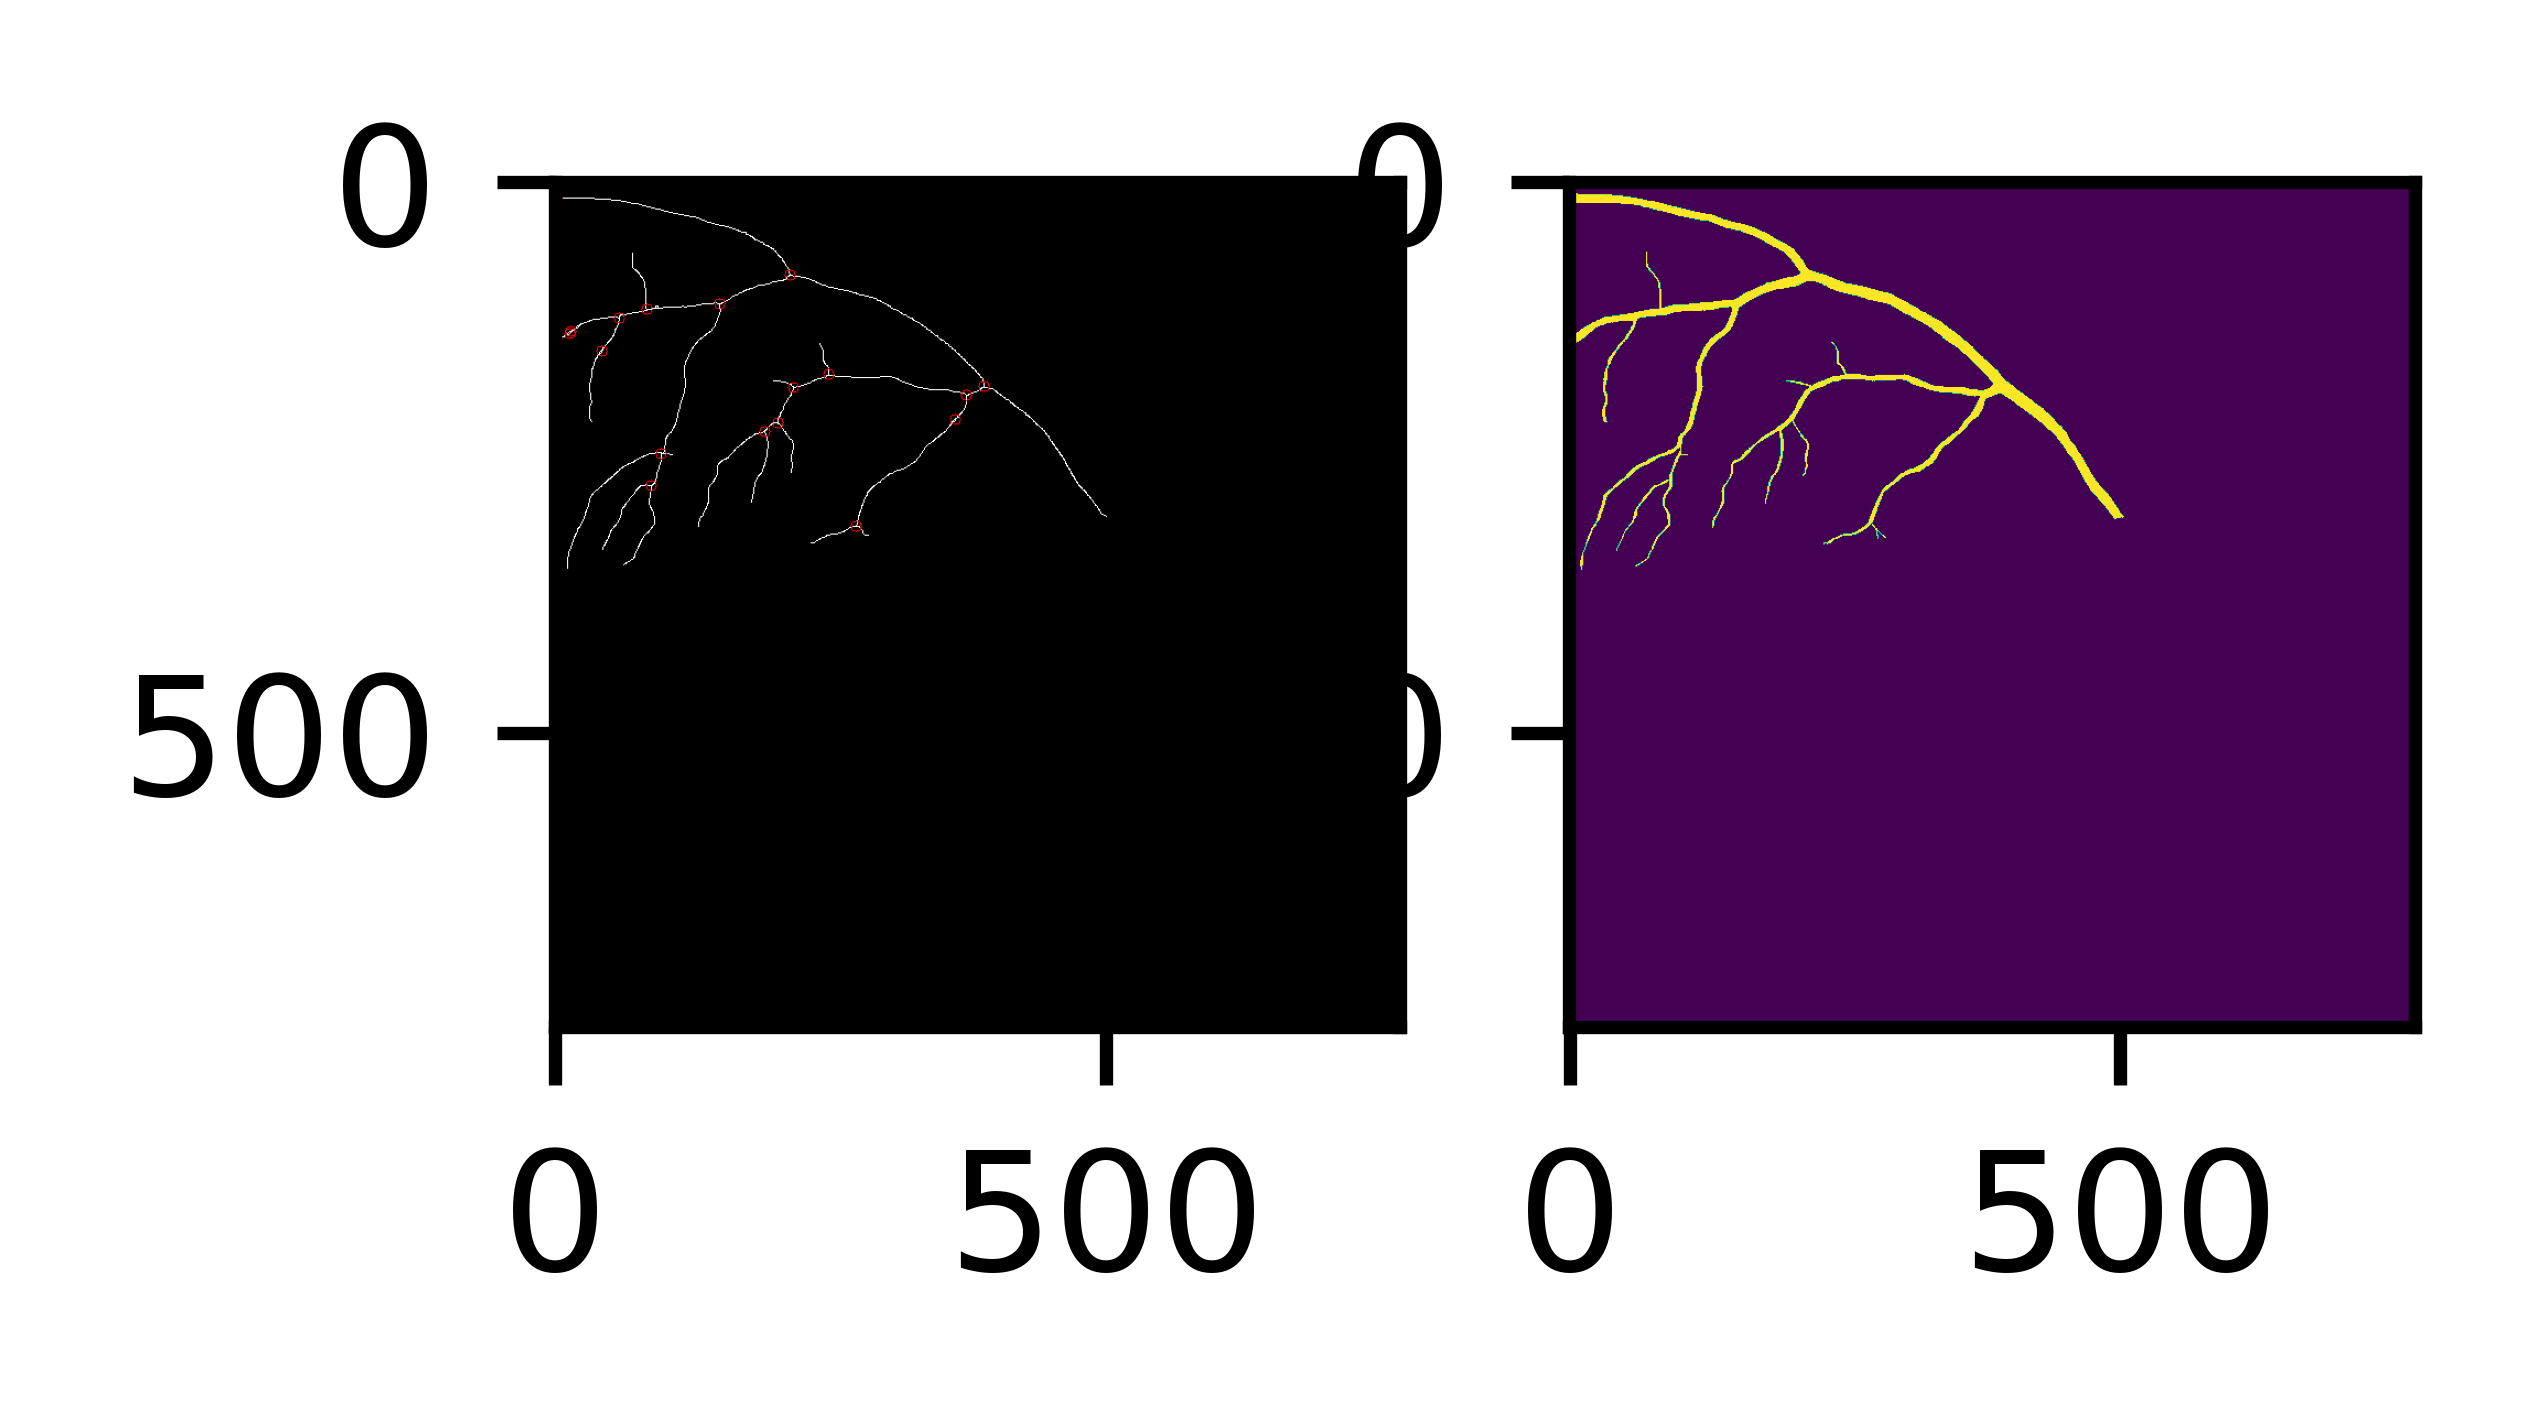

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Depending on the quality of the segmentation, you would need to regularize (smooth) it more or less 
#before computing the skeleton for instance by uncomment the following command
#segmentation = segmentation.filter(ImageFilter.ModeFilter(size=3))

def get_skeleton(image):
    import cv2
    # import skimage.io as io
    # image = io.imread(segmentation_path)
    print(image.shape,np.max(image))
    image = np.where(image>128,255,0).astype(np.uint8)
    print(image.dtype,np.max(image))
    # # 骨架化
    # skeleton = morphology.skeletonize(image)

    # # 保存结果
    # io.imsave('retina_vessel_skeleton.png', skeleton)


    A = 200
    L = 50

    # Centerline extraction using Zeun-Shang's thinning algorithm
    # Using opencv-contrib-python which provides very fast and efficient thinning algorithm
    # The package can be installed using pip
    thinned = cv2.ximgproc.thinning(image)
    # Filling broken lines via morphological closing using a linear kernel
    kernel = np.ones((1, 10), np.uint8)
    d_im = cv2.dilate(thinned, kernel)
    e_im = cv2.erode(d_im, kernel) 
    num_rows, num_cols = thinned.shape
    for i in range (1, 360//15):
        rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 15*i, 1)
        img_rotation = cv2.warpAffine(thinned, rotation_matrix, (num_cols, num_rows))
        temp_d_im = cv2.dilate(img_rotation, kernel)
        temp_e_im = cv2.erode(temp_d_im, kernel) 
        rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -15*i, 1)
        im = cv2.warpAffine(temp_e_im, rotation_matrix, (num_cols, num_rows))
        e_im = np.maximum(im, e_im)
    # Skeletonizing again to remove unwanted noise
    thinned1 = cv2.ximgproc.thinning(e_im)
    # thinned1 = thinned1*(mask/255)
    # Removing bifurcation points by using specially designed kernels
    # Can be optimized further! (not the best implementation)
    thinned1 = np.uint8(thinned1)



    thh = thinned1.copy()
    hi = thinned1.copy()
    thi = thinned1.copy()
    hi = cv2.cvtColor(hi, cv2.COLOR_GRAY2BGR)
    thi = cv2.cvtColor(thi, cv2.COLOR_GRAY2BGR)
    thh = thh/255
    kernel1 = np.array([[1,0,1],[0,1,0],[0,1,0]])
    kernel2 = np.array([[0,1,0],[1,1,1],[0,0,0]])
    kernel3 = np.array([[0,1,0],[0,1,1],[1,0,0]])
    kernel4 = np.array([[1,0,1],[0,1,0],[0,0,1]])
    kernel5 = np.array([[1,0,1],[0,1,0],[1,0,1]])
    kernels = [kernel1, kernel2, kernel3, kernel4, kernel5]
    for k in kernels:
        k1 = k
        k2 = cv2.rotate(k1, cv2.ROTATE_90_CLOCKWISE)
        k3 = cv2.rotate(k2, cv2.ROTATE_90_CLOCKWISE)
        k4 = cv2.rotate(k3, cv2.ROTATE_90_CLOCKWISE)
        ks = [k1, k2, k3, k4]
        for kernel in ks:
            th = cv2.filter2D(thh, -1, kernel)
            for i in range(th.shape[0]):
                for j in range(th.shape[1]):
                    if(th[i,j]==4.0):
                        cv2.circle(hi, (j, i), 2, (0, 255, 0), 2)
                        cv2.circle(thi, (j, i), 2, (0, 0, 0), 2)
    thi = cv2.cvtColor(thi, cv2.COLOR_BGR2GRAY)
    cl = thi.copy()
    contours, hierarchy = cv2.findContours(thi, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    for c in contours:
        if (c.size<L):
            cv2.drawContours(cl, [c], 0, 0, -1)


    # # Centerline superimposed on green channel
    # colors = [(100, 0, 150), (102, 0, 255), (0, 128, 255), (255, 255, 0), (10, 200, 10)]
    # colbgr = [(193, 182, 255), (255, 0, 102), (255, 128, 0), (0, 255, 255), (10, 200, 10)]
    # im = g.copy()
    # im = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
    # thc = cl
    # thh = thc.copy()
    # thh = cv2.cvtColor(thh, cv2.COLOR_GRAY2BGR)
    # contours, heirarchy = cv2.findContours(thc, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    # for c in contours:
        
    #         color = np.random.randint(len(colors))
    #         cv2.drawContours(im, c, -1, colbgr[color], 2, cv2.LINE_AA)

    cv2.imwrite('00.png',thinned1)
    # cv2.imshow('closed contour', thinned1)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    ## d = mv*1.5

    return thinned1

# segmentation = np.array(segmentation_src)/255 #Convert the segmentation to a numpy array with value 0 and 1
# skeleton = skeletonize(segmentation) # Compute the skeleton of the segmentation

# segmentation = (np.array(segmentation)*255).astype(np.uint8)[:,:,0]
# print(segmentation.shape,np.max(segmentation),segmentation.dtype)
# skeleton = get_skeleton()>128 # Compute the skeleton of the segmentation
# print(np.max(skeleton),skeleton.shape)

def thin_image(src, max_iterations=-1):
    assert src.dtype == np.uint8
    dst = src.copy()
    width, height = src.shape[::-1]
    count = 0
    
    while True:
        count += 1
        if max_iterations != -1 and count > max_iterations:
            break
        
        m_flag = []
        
        for i in range(height):
            for j in range(width):
                p1 = src[i, j]
                if p1 != 1:
                    continue
                p4 = src[i, j + 1] if j < width - 1 else 0
                p8 = src[i, j - 1] if j > 0 else 0
                p2 = src[i - 1, j] if i > 0 else 0
                p3 = src[i - 1, j + 1] if i > 0 and j < width - 1 else 0
                p9 = src[i - 1, j - 1] if i > 0 and j > 0 else 0
                p6 = src[i + 1, j] if i < height - 1 else 0
                p5 = src[i + 1, j + 1] if i < height - 1 and j < width - 1 else 0
                p7 = src[i + 1, j - 1] if i < height - 1 and j > 0 else 0
                
                if 2 <= p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 <= 6:
                    ap = 0
                    if p2 == 0 and p3 == 1:
                        ap += 1
                    if p3 == 0 and p4 == 1:
                        ap += 1
                    if p4 == 0 and p5 == 1:
                        ap += 1
                    if p5 == 0 and p6 == 1:
                        ap += 1
                    if p6 == 0 and p7 == 1:
                        ap += 1
                    if p7 == 0 and p8 == 1:
                        ap += 1
                    if p8 == 0 and p9 == 1:
                        ap += 1
                    if p9 == 0 and p2 == 1:
                        ap += 1
                    
                    if ap == 1 and p2 * p4 * p6 == 0 and p4 * p6 * p8 == 0:
                        m_flag.append((i, j))
        
        for i, j in m_flag:
            dst[i, j] = 0
        
        if not m_flag:
            break
    
    return dst

def filter_over(thin_src):
    assert thin_src.dtype == np.uint8
    width, height = thin_src.shape[::-1]
    
    for i in range(height):
        for j in range(width):
            p1 = thin_src[i, j]
            if p1 != 1:
                continue
            p4 = thin_src[i, j + 1] if j < width - 1 else 0
            p8 = thin_src[i, j - 1] if j > 0 else 0
            p2 = thin_src[i - 1, j] if i > 0 else 0
            p3 = thin_src[i - 1, j + 1] if i > 0 and j < width - 1 else 0
            p9 = thin_src[i - 1, j - 1] if i > 0 and j > 0 else 0
            p6 = thin_src[i + 1, j] if i < height - 1 else 0
            p5 = thin_src[i + 1, j + 1] if i < height - 1 and j < width - 1 else 0
            p7 = thin_src[i + 1, j - 1] if i < height - 1 and j > 0 else 0
            
            if p2 + p3 + p8 + p9 >= 1:
                thin_src[i, j] = 0
    cv2.imwrite('000.png',thin_src)
    return thin_src

def get_points(thin_src, radius=4, threshold_max=6, threshold_min=4):
    assert thin_src.dtype == np.uint8
    width, height = thin_src.shape[::-1]
    tmp = thin_src.copy()
    points = []
    
    for i in range(height):
        for j in range(width):
            if tmp[i, j] == 0:
                continue
            count = 0
            
            for k in range(i - radius, i + radius + 1):
                for l in range(j - radius, j + radius + 1):
                    if 0 <= k < height and 0 <= l < width and tmp[k, l] == 1:
                        count += 1
            
            if count > threshold_max or count < threshold_min:
                points.append((j, i))
    
    return points

def get_points_2(thin_src, radius=6, threshold_max=7, threshold_min=5):
    assert thin_src.dtype == np.uint8
    width, height = thin_src.shape[::-1]
    tmp = thin_src.copy()
    tmp = np.where(tmp == 0,0,1)
    points = []
    
    for i in range(height):
        for j in range(width):
            if tmp[i, j] == 0:
                continue
            count = 0
            
            for k in range(i - radius, i + radius + 1):
                for l in range(j - radius, j + radius + 1):
                    if 0 <= k < height and 0 <= l < width and tmp[k, l] == 1:
                        count += 1
            
            if count > threshold_max:
                points.append((j, i, 'Intersection'))
            elif count < threshold_min and count > 3:
                points.append((j, i, 'End'))
    
    return points

def get_neighbours(x,y,image):
    """Return 8-neighbours of image point P1(x,y), in a clockwise order"""
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1], img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]   
def getSkeletonIntersection(skeleton):
    """ Given a skeletonised image, it will give the coordinates of the intersections of the skeleton.
    
    Keyword arguments:
    skeleton -- the skeletonised image to detect the intersections of
    
    Returns: 
    List of 2-tuples (x,y) containing the intersection coordinates
    """
    # A biiiiiig list of valid intersections             2 3 4
    # These are in the format shown to the right         1 C 5
    #                                                    8 7 6 
    validIntersection = [[0,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,1],[1,0,0,1,0,1,0,0],
                         [0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[1,0,0,1,0,0,1,0],
                         [0,1,0,0,1,0,0,1],[1,0,1,0,0,1,0,0],[0,1,0,0,0,1,0,1],
                         [0,1,0,1,0,0,0,1],[0,1,0,1,0,1,0,0],[0,0,0,1,0,1,0,1],
                         [1,0,1,0,0,0,1,0],[1,0,1,0,1,0,0,0],[0,0,1,0,1,0,1,0],
                         [1,0,0,0,1,0,1,0],[1,0,0,1,1,1,0,0],[0,0,1,0,0,1,1,1],
                         [1,1,0,0,1,0,0,1],[0,1,1,1,0,0,1,0],[1,0,1,1,0,0,1,0],
                         [1,0,1,0,0,1,1,0],[1,0,1,1,0,1,1,0],[0,1,1,0,1,0,1,1],
                         [1,1,0,1,1,0,1,0],[1,1,0,0,1,0,1,0],[0,1,1,0,1,0,1,0],
                         [0,0,1,0,1,0,1,1],[1,0,0,1,1,0,1,0],[1,0,1,0,1,1,0,1],
                         [1,0,1,0,1,1,0,0],[1,0,1,0,1,0,0,1],[0,1,0,0,1,0,1,1],
                         [0,1,1,0,1,0,0,1],[1,1,0,1,0,0,1,0],[0,1,0,1,1,0,1,0],
                         [0,0,1,0,1,1,0,1],[1,0,1,0,0,1,0,1],[1,0,0,1,0,1,1,0],
                         [1,0,1,1,0,1,0,0]]
    image = skeleton.copy()
    image = image/255
    intersections = list()
    for x in range(1,len(image)-1):
        for y in range(1,len(image[x])-1):
            # If we have a white pixel
            if image[x][y] == 1:
                neighbours = get_neighbours(x,y,image)
                valid = True
                if neighbours in validIntersection:
                    intersections.append((y,x,'Intersection'))
    # Filter intersections to make sure we don't count them twice or ones that are very close together
    for point1 in intersections:
        for point2 in intersections:
            if (((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) < 10**2) and (point1 != point2):
                intersections.remove(point2)
    # Remove duplicates
    intersections = list(set(intersections))
    return intersections
if __name__ == "__main__":
    src = cv2.imread("../MorphoSnake/img/2.png", cv2.IMREAD_GRAYSCALE)
    
    if src is None:
        print("Failed to read the file!")
    else:
        # _, src = cv2.threshold(src, 128, 1, cv2.THRESH_BINARY)
        # dst = thin_image(src)
        dst = get_skeleton(src)
        # dst = src
        dst = filter_over(dst)### (0-255)
        # dst = dst.astype(np.uint8)
        # t = dst.copy()
    
        print(type(dst),dst.dtype,np.max(dst),np.min(dst))

        cv2.imwrite('dst.png',dst)
        # points = get_points_2(dst, 6, 9, 6)
        points = getSkeletonIntersection(dst)
        
        # dst = np.repeat(dst,[0,0,3])
        dst = cv2.cvtColor(dst,cv2.COLOR_GRAY2BGR)
        
        print(dst.shape)
        # dst = dst * 255
        # src = src * 255
        
        

        # for point in points:
        #     cv2.circle(dst, point, 2, 255, 1)
        print('Number of points: ',len(points))
        for point in points:
            x, y, point_type = point
            if point_type == 'Intersection':
                cv2.circle(dst, (x, y), 5, [255,0,0], 1)  # Draw Intersection Points
                # pass
            elif point_type == 'End':
                cv2.circle(dst, (x, y), 10, [0,255,0], 1)  # Draw End Points




    plt.figure(dpi=1200,figsize=(2,1))

    plt.subplot(121)
    plt.imshow(dst)
    plt.subplot(122)
    plt.imshow(src)
    
        # cv2.imwrite("dst.jpg", dst)

        # cv2.namedWindow("src", cv2.WINDOW_AUTOSIZE)
        # cv2.namedWindow("dst", cv2.WINDOW_AUTOSIZE)
        # cv2.imshow("src", src)
        # cv2.imshow("dst", dst)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

        # cv2.imwrite("dst.jpg", dst)
        # cv2.imshow("src1", src)
        # cv2.imshow("dst1", dst)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()


In [ ]:
https://legacy.imagemagick.org/Usage/morphology/#linejunctions

find the intersection points and then serch the circle in tree, if circle find the it is cross points. but maybe the aretry and vein not have circle

(768, 768) 255
uint8 255
[0 2 4 6]
[1 3 5 7]
[0 2 4]
[0 2 5]
[0 2 6]
[0 3 5]
[0 3 6]
[0 4 6]
[1 3 5]
[1 3 6]
[1 3 7]
[1 4 6]
[1 4 7]
[1 5 7]
[2 4 6]
[2 4 7]
[2 5 7]
[3 5 7]
[[ 12   0]
 [ 13   0]
 [ 17   0]
 [111 149]
 [115  91]
 [115  93]
 [124  58]
 [133  19]
 [137  12]
 [138  13]
 [139  11]
 [145   0]
 [146   0]
 [147   0]
 [148   0]
 [149   0]
 [150   0]
 [151   0]
 [152   0]
 [176 248]
 [187 389]
 [194 373]
 [214 365]
 [247  98]
 [313 273]]
1 18


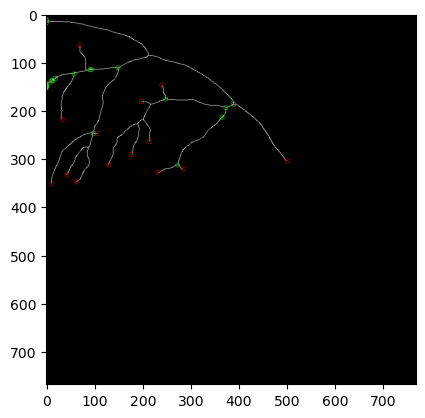

In [54]:
# Functions to generate kernels of curve intersection 
import itertools
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_nonadjacent_combination(input_list,take_n):
    """ 
    It generates combinations of m taken n at a time where there is no adjacent n.
    INPUT:
        input_list = (iterable) List of elements you want to extract the combination 
        take_n =     (integer) Number of elements that you are going to take at a time in
                     each combination
    OUTPUT:
        all_comb =   (np.array) with all the combinations
    """
    all_comb = []
    for comb in itertools.combinations(input_list, take_n):
        comb = np.array(comb)
        d = np.diff(comb)
        fd = np.diff(np.flip(comb))
        if len(d[d==1]) == 0 and comb[-1] - comb[0] != 7:
            all_comb.append(comb)        
            print(comb)
    return all_comb


def populate_intersection_kernel(combinations):
    """
    Maps the numbers from 0-7 into the 8 pixels surrounding the center pixel in
    a 9 x 9 matrix clockwisely i.e. up_pixel = 0, right_pixel = 2, etc. And 
    generates a kernel that represents a line intersection, where the center 
    pixel is occupied and 3 or 4 pixels of the border are ocuppied too.
    INPUT:
        combinations = (np.array) matrix where every row is a vector of combinations
    OUTPUT:
        kernels =      (List) list of 9 x 9 kernels/masks. each element is a mask.
    """
    n = len(combinations[0])
    template = np.array((
            [-1, -1, -1],
            [-1, 1, -1],
            [-1, -1, -1]), dtype="int")
    match = [(0,1),(0,2),(1,2),(2,2),(2,1),(2,0),(1,0),(0,0)]
    kernels = []
    for n in combinations:
        tmp = np.copy(template)
        for m in n:
            tmp[match[m][0],match[m][1]] = 1
        kernels.append(tmp)
    return kernels


def give_intersection_kernels():
    """
    Generates all the intersection kernels in a 9x9 matrix.
    INPUT:
        None
    OUTPUT:
        kernels =      (List) list of 9 x 9 kernels/masks. each element is a mask.
    """
    input_list = np.arange(8)
    taken_n = [4,3]
    kernels = []
    for taken in taken_n:
        comb = generate_nonadjacent_combination(input_list,taken)
        tmp_ker = populate_intersection_kernel(comb)
        kernels.extend(tmp_ker)
    return kernels


# Find the curve intersections
def find_line_intersection(input_image, show=0):
    """
    Applies morphologyEx with parameter HitsMiss to look for all the curve 
    intersection kernels generated with give_intersection_kernels() function.
    INPUT:
        input_image =  (np.array dtype=np.uint8) binarized m x n image matrix
    OUTPUT:
        output_image = (np.array dtype=np.uint8) image where the nonzero pixels 
                       are the line intersection.
    """
    kernel = np.array(give_intersection_kernels())
    output_image = np.zeros(input_image.shape)
    for i in np.arange(len(kernel)):
        out = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel[i,:,:])
        output_image = output_image + out
    if show == 1:
        show_image = np.reshape(np.repeat(input_image, 3, axis=1),(input_image.shape[0],input_image.shape[1],3))*255
        show_image[:,:,1] = show_image[:,:,1] -  output_image *255
        show_image[:,:,2] = show_image[:,:,2] -  output_image *255
        plt.imshow(show_image)
    return output_image

#  finding corners
def find_endoflines(input_image, show=0):
    """
    """
    kernel_0 = np.array((
            [-1, -1, -1],
            [-1, 1, -1],
            [-1, 1, -1]), dtype="int")

    kernel_1 = np.array((
        [-1, -1, -1],
        [-1, 1, -1],
        [1,-1, -1]), dtype="int")

    kernel_2 = np.array((
        [-1, -1, -1],
        [1, 1, -1],
        [-1,-1, -1]), dtype="int")

    kernel_3 = np.array((
        [1, -1, -1],
        [-1, 1, -1],
        [-1,-1, -1]), dtype="int")

    kernel_4 = np.array((
        [-1, 1, -1],
        [-1, 1, -1],
        [-1,-1, -1]), dtype="int")

    kernel_5 = np.array((
        [-1, -1, 1],
        [-1, 1, -1],
        [-1,-1, -1]), dtype="int")

    kernel_6 = np.array((
        [-1, -1, -1],
        [-1, 1, 1],
        [-1,-1, -1]), dtype="int")

    kernel_7 = np.array((
        [-1, -1, -1],
        [-1, 1, -1],
        [-1,-1, 1]), dtype="int")

    kernel = np.array((kernel_0,kernel_1,kernel_2,kernel_3,kernel_4,kernel_5,kernel_6, kernel_7))
    output_image = np.zeros(input_image.shape)
    for i in np.arange(8):
        out = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, kernel[i,:,:])
        # print(out.shape)
        output_image = output_image + out

    if show == 1:
        show_image = np.reshape(np.repeat(input_image, 3, axis=1),(input_image.shape[0],input_image.shape[1],3))*255
        show_image[:,:,1] = show_image[:,:,1] -  output_image *255
        show_image[:,:,2] = show_image[:,:,2] -  output_image *255
        plt.imshow(show_image)    

    return output_image#, np.where(output_image == 1)

if __name__ == "__main__":
    src = cv2.imread("../MorphoSnake/img/2.png", cv2.IMREAD_GRAYSCALE)
    
    if src is None:
        print("Failed to read the file!")
    else:
        # _, src = cv2.threshold(src, 128, 1, cv2.THRESH_BINARY)
        # dst = thin_image(src)
        dst = get_skeleton(src)
        # dst = src
        dst = filter_over(dst)### (0-255)
        # dst = dst.astype(np.uint8)
        # h,w = dst.shape
        # skel_rgb = np.zeros((*dst.shape,3))
        # print(skel_rgb.shape)
        # skel_rgb[:,:,0] = dst.copy()
        skel_rgb = cv2.cvtColor(dst,cv2.COLOR_GRAY2RGB)
    
        # print(type(dst),dst.dtype,np.max(dst),np.min(dst))

        cv2.imwrite('dst.png',dst)
        # points = get_points_2(dst, 6, 9, 6)
        # points = getSkeletonIntersection(dst)

    # 0- Find end of lines
    dst = np.where(dst==0,0,1)
    input_image = dst.astype(np.uint8) # must be blaack and white thin network image
    eol_img = find_endoflines(input_image, 0)
    eol_img = eol_img.astype(np.uint8)
    end_points_p  = np.argwhere(eol_img == 1)
    # print(end_points_p)
    

    for point in end_points_p:
        y, x = point
        cv2.circle(skel_rgb, (x, y), 5, [255,0,0], 1)  # Draw end Points

    
    # 1- Find curve Intersections
    lint_img = find_line_intersection(input_image, 0)
    lint_img = lint_img.astype(np.uint8)
    lint_points_p  = np.argwhere(lint_img == 1)
    # print(lint_points_p)
    for point in lint_points_p:
        y, x = point
        cv2.circle(skel_rgb, (x, y), 5, [0,255,0], 1)  # Draw Intersection Points
    
    # 2- Put together all the nodes
    nodes = eol_img + lint_img
    # print(np.max(eol_img),np.sum(eol_img))
    plt.imshow((skel_rgb).astype(np.uint8))


(768, 768)